## Exploratory data analysis (EDA)
### Theter Gold

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
df = pd.read_csv('DATA\\registros_tether-gold.csv')
df = df.drop(columns='Unnamed: 0')
df
moneda = 'Tether Gold'

##  Analisis General

In [5]:
# Una descripcion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1304 non-null   object 
 1   price               1304 non-null   float64
 2   market_caps         1304 non-null   float64
 3   total_volumes       1304 non-null   float64
 4   Circulating supply  1304 non-null   float64
dtypes: float64(4), object(1)
memory usage: 51.1+ KB


Se observa que no hay valores faltantes, la fecha esta en tipo object, se cambiara a timestamp

In [6]:
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                1304 non-null   datetime64[ns]
 1   price               1304 non-null   float64       
 2   market_caps         1304 non-null   float64       
 3   total_volumes       1304 non-null   float64       
 4   Circulating supply  1304 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 51.1 KB


veamos si hay registros duplicados

In [7]:
df.duplicated().sum()

0

cada registro del dataframe es unico

In [8]:
#ahora veamos unas estadisticas generales del dataframe

df.describe()

,price,market_caps,total_volumes,Circulating supply
count,1304.000000,1.304000e+03,1.304000e+03,1304.000000
mean,1821.453058,2.714366e+08,1.939377e+06,147449.884565
std,106.137414,1.727662e+08,4.718151e+06,92140.577456
min,1477.825091,0.000000e+00,0.000000e+00,0.000000
25%,1736.002839,9.378478e+07,1.650526e+05,50037.106310
50%,1819.496233,1.623533e+08,6.260330e+05,85863.187629
75%,1902.623017,4.534735e+08,1.858294e+06,246468.634214
max,2051.214002,5.055993e+08,8.949791e+07,253145.531677


## Analisis univariable
Se hara un boxplot por cada variable en busca de outliers

<Axes: >

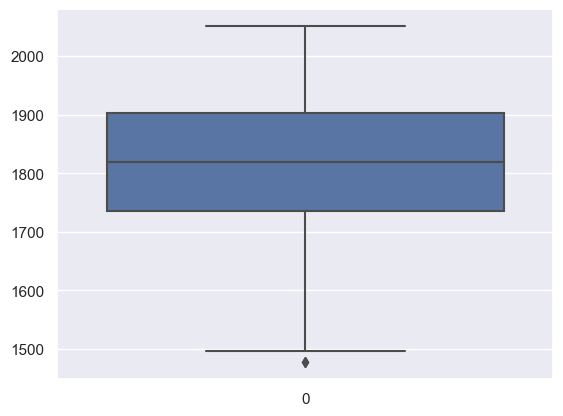

In [9]:
#rangos del precio
sns.boxplot(df['price'])

<Axes: >

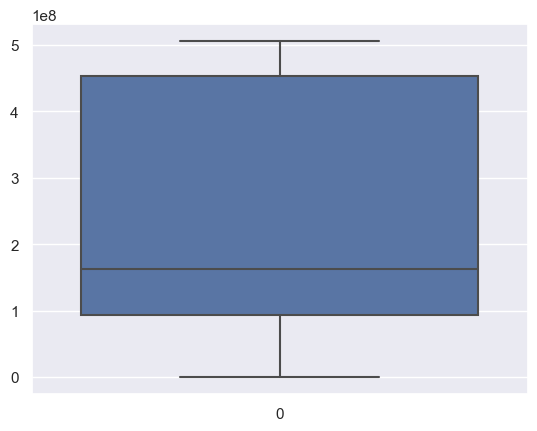

In [10]:
#rango de los capitales de mercado
sns.boxplot(df['market_caps'])

<Axes: >

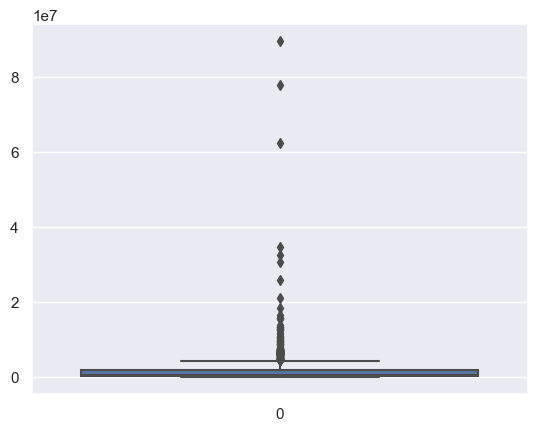

In [11]:
#rango de los volumenes
sns.boxplot(df['total_volumes'])

<Axes: >

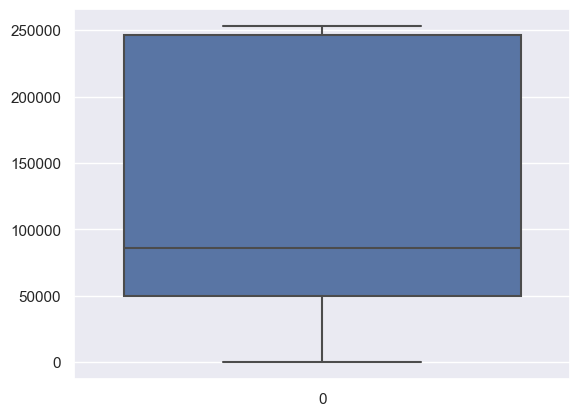

In [12]:
#rango de los tokens en circulacion
sns.boxplot(df['Circulating supply'])

#### *Se observa una cantidad considerable de outliers en la variable* `total_volumes` 

Estos outliers representan las anomalias del mercado que ocurrieron en el periodo de tiempo
del dataset, esto es comun es todas las criptos, se ha visto en toda su historia que causas externas
pueden afectar al precio.

In [13]:
df['total_volumes'].describe()

count    1.304000e+03
mean     1.939377e+06
std      4.718151e+06
min      0.000000e+00
25%      1.650526e+05
50%      6.260330e+05
75%      1.858294e+06
max      8.949791e+07
Name: total_volumes, dtype: float64

## Analisis multivariable

Text(0.5, 1.0, 'Tether Gold Market_cap vs Circulating supply')

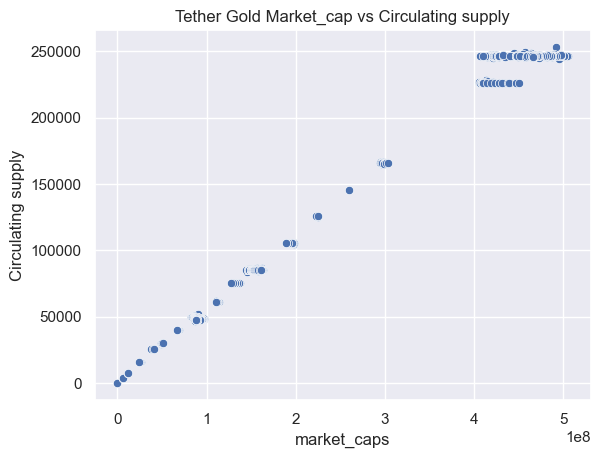

In [17]:
sns.scatterplot(data=df, x='market_caps', y='Circulating supply').set_title(f'{moneda} Market_cap vs Circulating supply')

Los Circulating supply y market_caps tienen una alta dependencia

#### Hagamos un chequeo general de las relaciones entre las variables

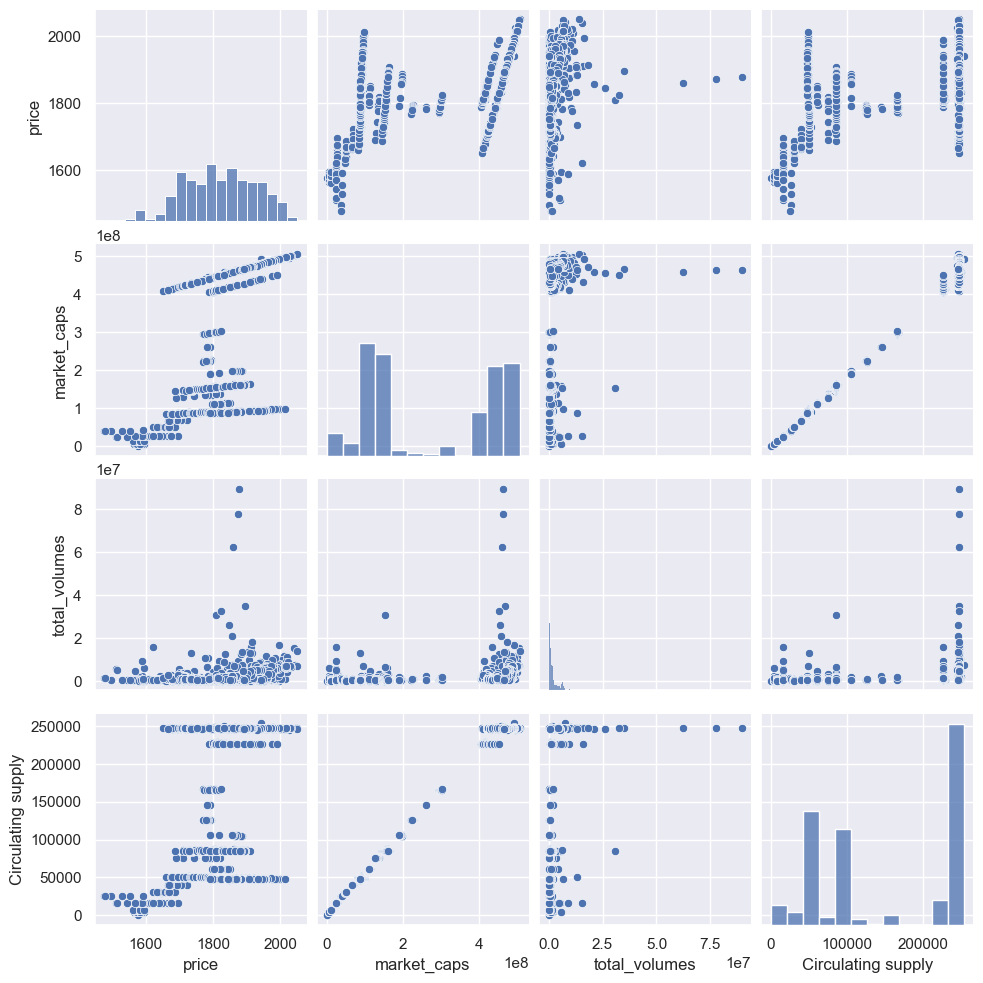

In [18]:
sns.pairplot(df)

## Tendencias del precio

Se analizaran las tendencias de precio de cada año registrado del precio 

Text(0.5, 1.0, 'Tether Gold price 2019-08-22 / 2020-08-22')

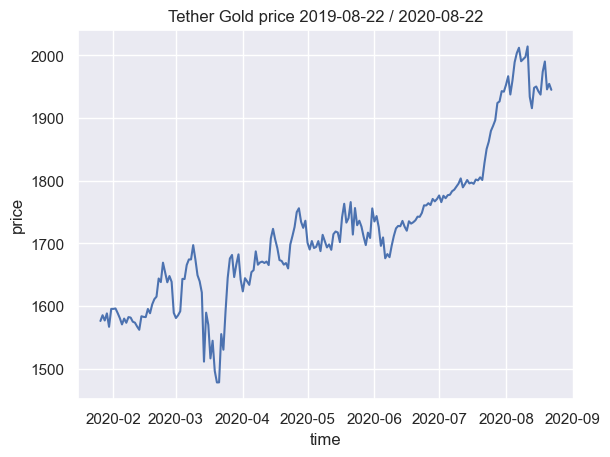

In [21]:
df2 = df[(df['time']> '2019-08-22 00:00:00') & (df['time']<= '2020-08-22 00:00:00')]
sns.lineplot(data=df2, x='time', y='price').set_title(f'{moneda} price 2019-08-22 / 2020-08-22')

Text(0.5, 1.0, 'Tether Gold price 2020-08-22 / 2021-08-22')

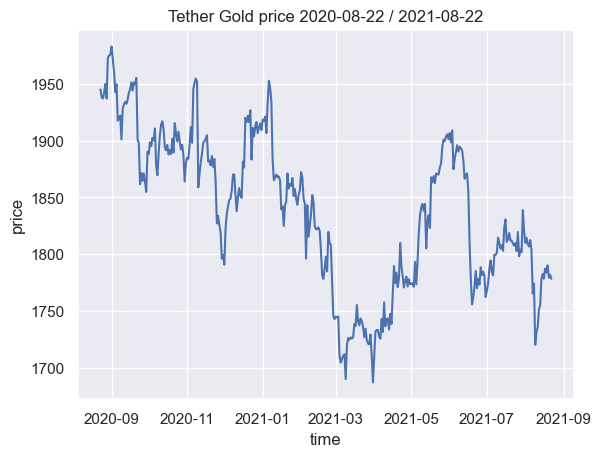

In [22]:
df3 = df[(df['time']> '2020-08-22 00:00:00') & (df['time']<= '2021-08-22 00:00:00')]
sns.lineplot(data=df3, x='time', y='price').set_title(f'{moneda} price 2020-08-22 / 2021-08-22')

Text(0.5, 1.0, 'Tether Gold price 2021-08-22 / 2022-08-22')

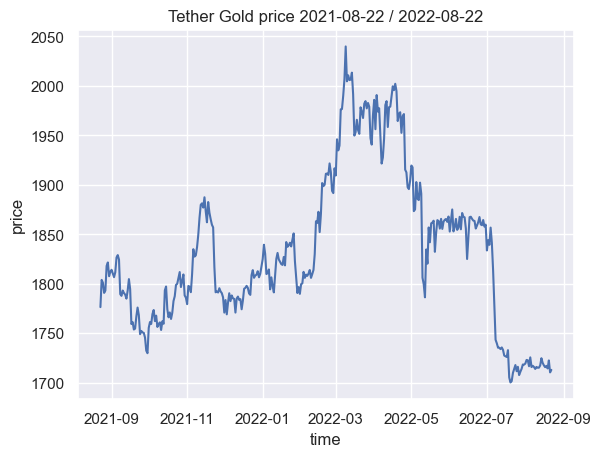

In [23]:
df4 = df[(df['time']> '2021-08-22 00:00:00') & (df['time']<= '2022-08-22 00:00:00')]
sns.lineplot(data=df4, x='time', y='price').set_title(f'{moneda} price 2021-08-22 / 2022-08-22')

Text(0.5, 1.0, 'Tether Gold price 2022-08-22 / 2023-08-22')

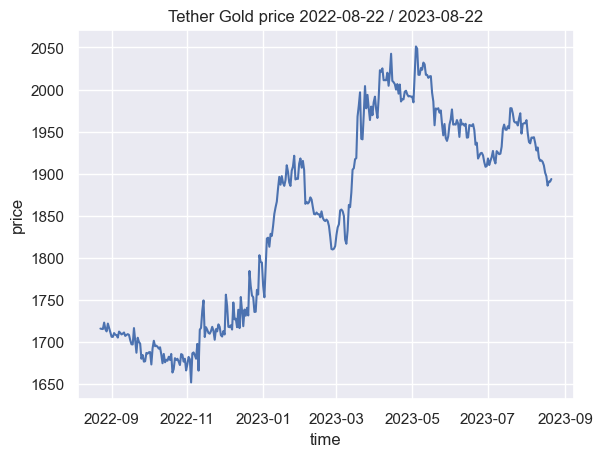

In [24]:
df5 = df[(df['time']> '2022-08-22 00:00:00') & (df['time']<= '2023-08-22 00:00:00')]
sns.lineplot(data=df5, x='time', y='price').set_title(f'{moneda} price 2022-08-22 / 2023-08-22')